In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm

from thirdparty.fem_2d_rec import fem_poisson_solver,mesh_fem_2d_rec,get_matrices_2d
from common.util import create_boundary_mask, Dirichlet_bc_tensor, Dirichlet_bc_array
from models.autoencoder import Autoencoder
from loss.unsupervised_loss import unsupervised_loss

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
f_values = np.arange(-5000, 5000, 2)
np.savetxt('./f_constant.txt', f_values, fmt='%f')
print("Create f_constant.txt.")

Create f_constant.txt.


In [4]:
f_values = np.loadtxt('./f_constant.txt')
print(f"Loaded {len(f_values)} f function.")

Loaded 5000 f function.


In [5]:
input_shape = (256, 256)
f_matrices = np.array([np.full(input_shape, f_value) for f_value in f_values])
print(f"{len(f_matrices)} f matrices")

5000 f matrices


In [6]:
class PoissonDataset(Dataset):
    def __init__(self, f_matrices):
        self.f_matrices = f_matrices

    def __len__(self):
        return len(self.f_matrices)

    def __getitem__(self, idx):
        f_matrix = self.f_matrices[idx]
        f_tensor = torch.tensor(f_matrix).unsqueeze(0).float()  # (1, H, W) 형태로 변환
        return f_tensor

In [7]:
dataset = PoissonDataset(f_matrices)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [11]:
a = 0
b = 1
k = 1
M = 255
h = 1 / M

/home/fned/anaconda3/envs/pytorch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  1%|          | 1/100 [00:05<08:18,  5.04s/it]

Loss: 74157.22647852807


  2%|▏         | 2/100 [00:08<06:56,  4.25s/it]

Loss: 10877.317886644109


  3%|▎         | 3/100 [00:12<06:27,  3.99s/it]

Loss: 9315.408720951931


  4%|▍         | 4/100 [00:16<06:11,  3.87s/it]

Loss: 7378.769243568372


  5%|▌         | 5/100 [00:19<06:00,  3.79s/it]

Loss: 5807.423588649483


  6%|▌         | 6/100 [00:23<05:55,  3.78s/it]

Loss: 4917.610629136395


  7%|▋         | 7/100 [00:27<05:49,  3.75s/it]

Loss: 4519.397320595516


  8%|▊         | 8/100 [00:30<05:43,  3.74s/it]

Loss: 4371.491779886233


  9%|▉         | 9/100 [00:34<05:40,  3.74s/it]

Loss: 4274.08891189478


 10%|█         | 10/100 [00:38<05:35,  3.73s/it]

Loss: 4219.241359054663


 11%|█         | 11/100 [00:42<05:33,  3.74s/it]

Loss: 4174.27544660629


 12%|█▏        | 12/100 [00:45<05:29,  3.74s/it]

Loss: 4138.859866391322


 13%|█▎        | 13/100 [00:49<05:24,  3.73s/it]

Loss: 4114.100105431429


 14%|█▍        | 14/100 [00:53<05:19,  3.72s/it]

Loss: 4088.324870310012


 15%|█▌        | 15/100 [00:57<05:18,  3.74s/it]

Loss: 4079.4351005797175


 16%|█▌        | 16/100 [01:00<05:11,  3.71s/it]

Loss: 4073.549479296253


 17%|█▋        | 17/100 [01:04<05:07,  3.71s/it]

Loss: 4055.48811719372


 18%|█▊        | 18/100 [01:08<05:01,  3.68s/it]

Loss: 4044.0055036605545


 19%|█▉        | 19/100 [01:11<04:56,  3.66s/it]

Loss: 4049.9108031449045


 20%|██        | 20/100 [01:15<04:51,  3.65s/it]

Loss: 4048.954517534584


 21%|██        | 21/100 [01:18<04:48,  3.65s/it]

Loss: 4032.957827428344


 22%|██▏       | 22/100 [01:22<04:46,  3.68s/it]

Loss: 4026.509934346387


 23%|██▎       | 23/100 [01:26<04:42,  3.67s/it]

Loss: 4024.85674349062


 24%|██▍       | 24/100 [01:29<04:39,  3.68s/it]

Loss: 4019.032878122512


 25%|██▌       | 25/100 [01:33<04:35,  3.67s/it]

Loss: 4022.4212525969097


 26%|██▌       | 26/100 [01:37<04:31,  3.67s/it]

Loss: 4015.252738418093


 27%|██▋       | 27/100 [01:41<04:31,  3.72s/it]

Loss: 4012.6659059949743


 28%|██▊       | 28/100 [01:44<04:27,  3.71s/it]

Loss: 4008.3050086148983


 29%|██▉       | 29/100 [01:48<04:23,  3.71s/it]

Loss: 4028.993985898935


 30%|███       | 30/100 [01:52<04:19,  3.70s/it]

Loss: 4007.3951688146894


 31%|███       | 31/100 [01:55<04:14,  3.69s/it]

Loss: 4003.36874175831


 32%|███▏      | 32/100 [01:59<04:08,  3.65s/it]

Loss: 3997.791633362983


 33%|███▎      | 33/100 [02:02<04:01,  3.61s/it]

Loss: 3993.825762511818


 34%|███▍      | 34/100 [02:06<03:55,  3.57s/it]

Loss: 4018.5300370720543


 35%|███▌      | 35/100 [02:09<03:50,  3.55s/it]

Loss: 3993.472090216959


 36%|███▌      | 36/100 [02:13<03:44,  3.51s/it]

Loss: 3985.938733143412


 37%|███▋      | 37/100 [02:16<03:39,  3.49s/it]

Loss: 4042.156234449642


 38%|███▊      | 38/100 [02:20<03:36,  3.49s/it]

Loss: 4430.292903438495


 39%|███▉      | 39/100 [02:23<03:33,  3.50s/it]

Loss: 4044.613940196432


 40%|████      | 40/100 [02:27<03:28,  3.47s/it]

Loss: 4013.194501548816


 41%|████      | 41/100 [02:30<03:26,  3.51s/it]

Loss: 4000.290795976189


 42%|████▏     | 42/100 [02:34<03:22,  3.49s/it]

Loss: 3990.5951433121018


 43%|████▎     | 43/100 [02:37<03:17,  3.46s/it]

Loss: 3982.5033122263135


 44%|████▍     | 44/100 [02:41<03:14,  3.47s/it]

Loss: 3979.487701221636


 45%|████▌     | 45/100 [02:44<03:14,  3.54s/it]

Loss: 3973.888209251841


 46%|████▌     | 46/100 [02:48<03:12,  3.56s/it]

Loss: 3972.079935061704


 47%|████▋     | 47/100 [02:52<03:10,  3.60s/it]

Loss: 3970.757749909808


 48%|████▊     | 48/100 [02:55<03:08,  3.63s/it]

Loss: 3968.7107878278016


 49%|████▉     | 49/100 [02:59<03:06,  3.66s/it]

Loss: 3973.1731067827554


 50%|█████     | 50/100 [03:03<03:03,  3.68s/it]

Loss: 3964.4035139144607


 51%|█████     | 51/100 [03:06<02:59,  3.67s/it]

Loss: 3955.8953313159336


 52%|█████▏    | 52/100 [03:10<02:57,  3.70s/it]

Loss: 3954.3030274992534


 53%|█████▎    | 53/100 [03:14<02:54,  3.70s/it]

Loss: 3951.792940759355


 54%|█████▍    | 54/100 [03:18<02:50,  3.70s/it]

Loss: 3946.478507072303


 55%|█████▌    | 55/100 [03:21<02:47,  3.73s/it]

Loss: 3943.6141901684414


 56%|█████▌    | 56/100 [03:25<02:44,  3.74s/it]

Loss: 3949.255228030454


 57%|█████▋    | 57/100 [03:29<02:41,  3.75s/it]

Loss: 3937.747222706011


 58%|█████▊    | 58/100 [03:33<02:38,  3.77s/it]

Loss: 3935.057293351289


 59%|█████▉    | 59/100 [03:36<02:33,  3.73s/it]

Loss: 3938.6334753340216


 60%|██████    | 60/100 [03:40<02:28,  3.71s/it]

Loss: 3929.233073435012


 61%|██████    | 61/100 [03:44<02:23,  3.69s/it]

Loss: 3928.0085791326633


 62%|██████▏   | 62/100 [03:47<02:19,  3.68s/it]

Loss: 3924.545023341088


 63%|██████▎   | 63/100 [03:51<02:16,  3.68s/it]

Loss: 3925.484148742287


 64%|██████▍   | 64/100 [03:55<02:11,  3.67s/it]

Loss: 3923.1732683121018


 65%|██████▌   | 65/100 [03:58<02:07,  3.66s/it]

Loss: 3920.4663148138934


 66%|██████▌   | 66/100 [04:02<02:04,  3.66s/it]

Loss: 3919.2515705861865


 67%|██████▋   | 67/100 [04:06<02:00,  3.66s/it]

Loss: 3915.4335890848924


 68%|██████▊   | 68/100 [04:09<01:57,  3.67s/it]

Loss: 3929.7534381842156


 69%|██████▉   | 69/100 [04:13<01:53,  3.65s/it]

Loss: 3911.446659938545


 70%|███████   | 70/100 [04:17<01:49,  3.64s/it]

Loss: 3911.1720507190485


 71%|███████   | 71/100 [04:20<01:46,  3.66s/it]

Loss: 3907.4849970143314


 72%|███████▏  | 72/100 [04:24<01:42,  3.67s/it]

Loss: 3909.777360855394


 73%|███████▎  | 73/100 [04:28<01:38,  3.66s/it]

Loss: 3904.630035983529


 74%|███████▍  | 74/100 [04:31<01:35,  3.67s/it]

Loss: 3901.5931664728055


 75%|███████▌  | 75/100 [04:35<01:32,  3.72s/it]

Loss: 3902.8505797173566


 76%|███████▌  | 76/100 [04:39<01:28,  3.69s/it]

Loss: 3897.285129036873


 77%|███████▋  | 77/100 [04:42<01:24,  3.68s/it]

Loss: 3897.710192637838


 78%|███████▊  | 78/100 [04:46<01:21,  3.69s/it]

Loss: 3895.893312101911


 79%|███████▉  | 79/100 [04:50<01:17,  3.71s/it]

Loss: 3895.6083401236565


 80%|████████  | 80/100 [04:54<01:13,  3.69s/it]

Loss: 3892.2655161474922


 81%|████████  | 81/100 [04:57<01:09,  3.67s/it]

Loss: 3890.023334867635


 82%|████████▏ | 82/100 [05:01<01:05,  3.66s/it]

Loss: 3886.9395013311105


 83%|████████▎ | 83/100 [05:05<01:02,  3.67s/it]

Loss: 3886.899758502936


 84%|████████▍ | 84/100 [05:08<00:59,  3.71s/it]

Loss: 3887.4397835701134


 85%|████████▌ | 85/100 [05:12<00:55,  3.73s/it]

Loss: 3885.0285597880174


 86%|████████▌ | 86/100 [05:16<00:51,  3.70s/it]

Loss: 3886.305856886943


 87%|████████▋ | 87/100 [05:19<00:47,  3.68s/it]

Loss: 3884.502778071507


 88%|████████▊ | 88/100 [05:23<00:44,  3.67s/it]

Loss: 3879.125985892715


 89%|████████▉ | 89/100 [05:27<00:40,  3.69s/it]

Loss: 3879.760136501045


 90%|█████████ | 90/100 [05:30<00:36,  3.68s/it]

Loss: 3880.079425009952


 91%|█████████ | 91/100 [05:34<00:33,  3.69s/it]

Loss: 3877.474084550408


 92%|█████████▏| 92/100 [05:38<00:29,  3.68s/it]

Loss: 3878.4157668192674


 93%|█████████▎| 93/100 [05:42<00:25,  3.70s/it]

Loss: 3880.8683942078023


 94%|█████████▍| 94/100 [05:45<00:22,  3.70s/it]

Loss: 3874.3671575655603


 95%|█████████▌| 95/100 [05:49<00:18,  3.69s/it]

Loss: 3874.0886805832006


 96%|█████████▌| 96/100 [05:52<00:14,  3.63s/it]

Loss: 3875.3784006689766


 97%|█████████▋| 97/100 [05:56<00:10,  3.62s/it]

Loss: 3872.3155066617733


 98%|█████████▊| 98/100 [05:59<00:07,  3.58s/it]

Loss: 3873.0150418615644


 99%|█████████▉| 99/100 [06:03<00:03,  3.52s/it]

Loss: 3872.100125646895


100%|██████████| 100/100 [06:06<00:00,  3.67s/it]

Loss: 3870.049035722283


Last Loss: 3870.0490 Last model saved to last_autoencoder_model.pth
Best Loss: 3870.0490 Best model saved to best_autoencoder_model.pth


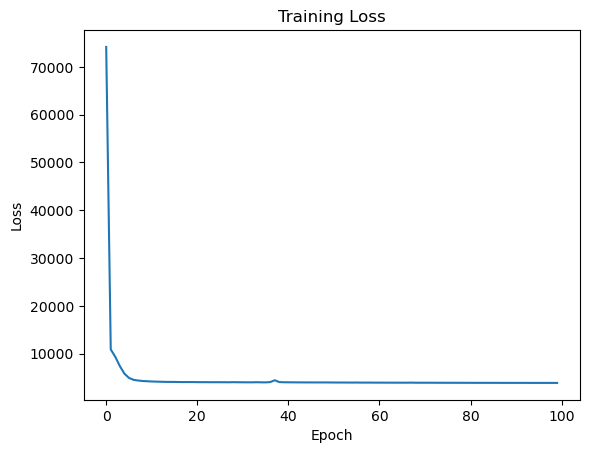

In [12]:
model = Autoencoder()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model = model.to(device)

interior_mask = create_boundary_mask((256, 256)).to(device)

num_epochs = 100
best_loss = float('inf')
train_losses = []
for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0
    for data in train_loader:
        inputs = data
        inputs = inputs.to(device)
        optimizer.zero_grad()
        u_pred, _ = model(inputs)
        u_pred = Dirichlet_bc_tensor(u_pred, g=0)
        loss = unsupervised_loss(u_pred, inputs, h, interior_mask)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Loss: {train_loss}')
    
    if train_loss < best_loss:
        best_loss = train_loss
        best_model_wts = model.state_dict()

torch.save(model.state_dict(), 'last_autoencoder_model.pth')
torch.save(best_model_wts, 'best_autoencoder_model.pth')

print(f'Last Loss: {train_loss:.4f} Last model saved to last_autoencoder_model.pth')
print(f'Best Loss: {best_loss:.4f} Best model saved to best_autoencoder_model.pth')

plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [13]:
model.load_state_dict(torch.load('best_autoencoder_model.pth'))
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=131072, out_features=128, bias=True)
    (11): ReLU()
  )
  (fc): Linear(in_features=128, out_features=128, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=131072, bias=True)
    (1): ReLU()
    (2): Unflatten(dim=1, unflattened_size=(128, 32, 32))
    (3): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2)

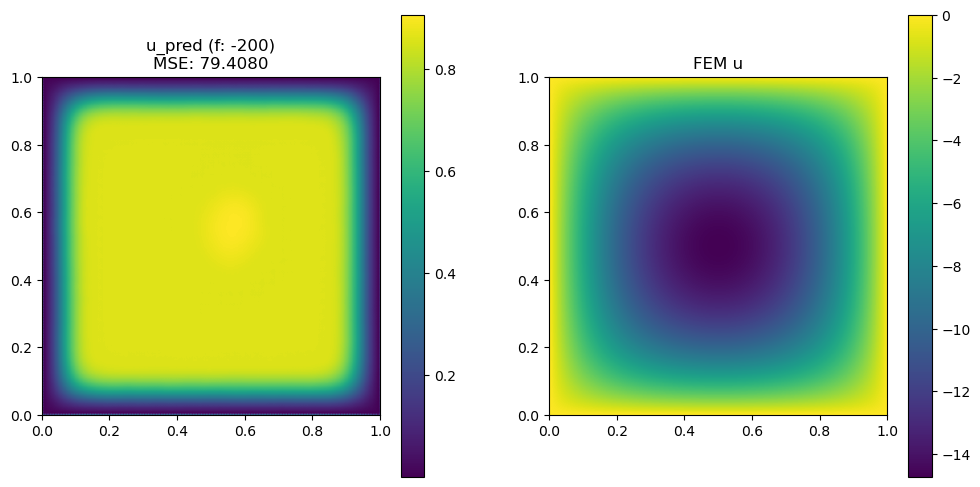

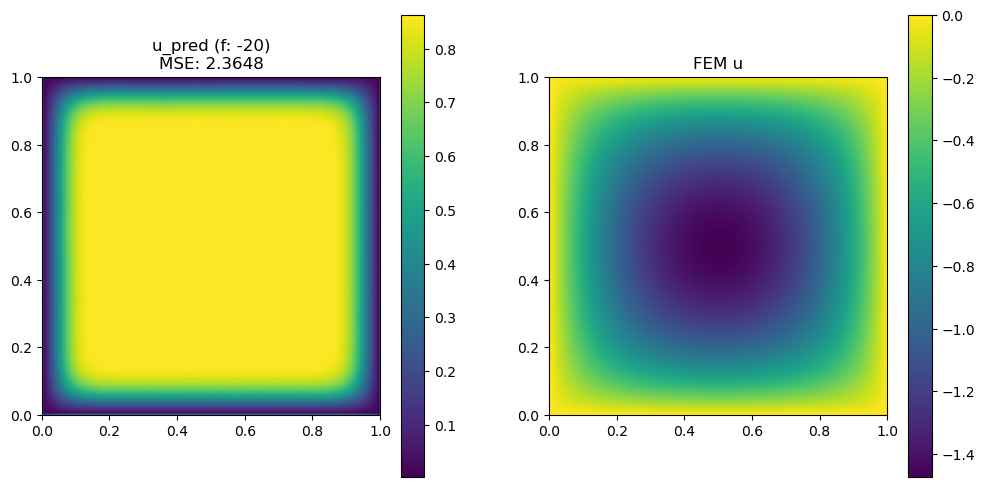

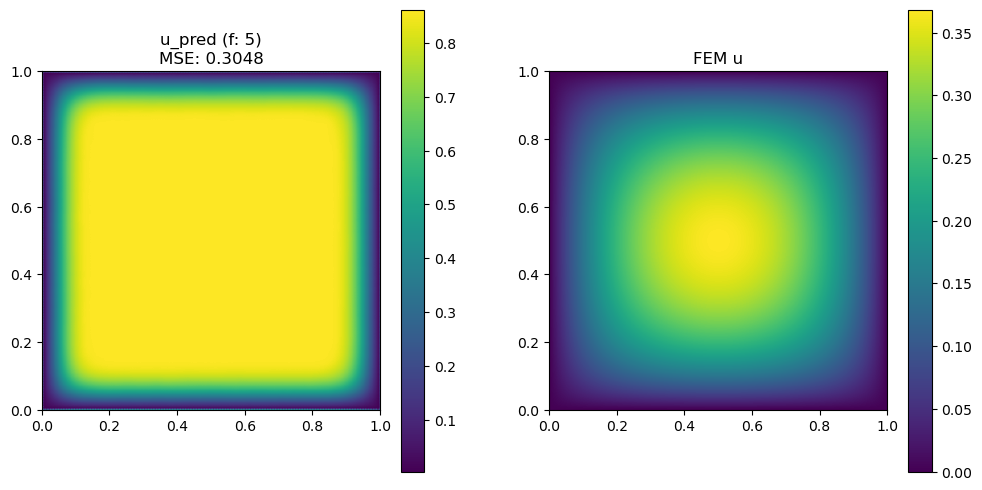

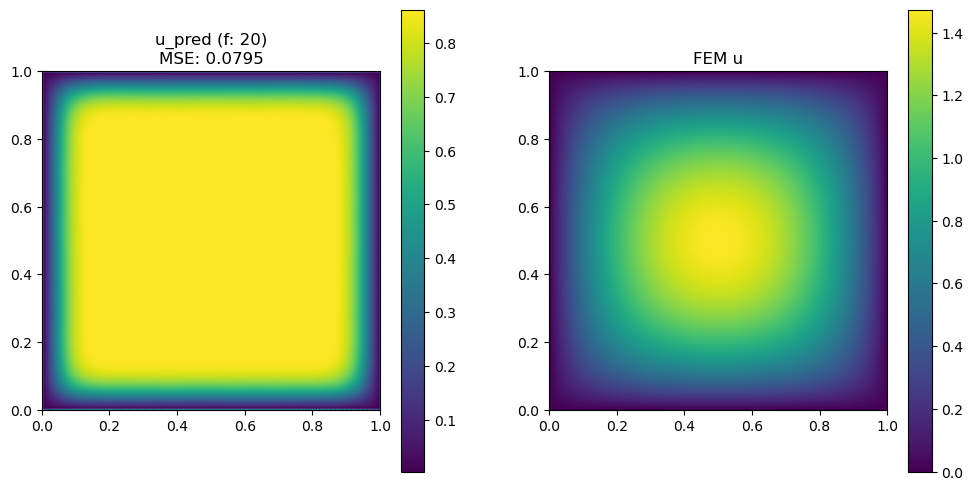

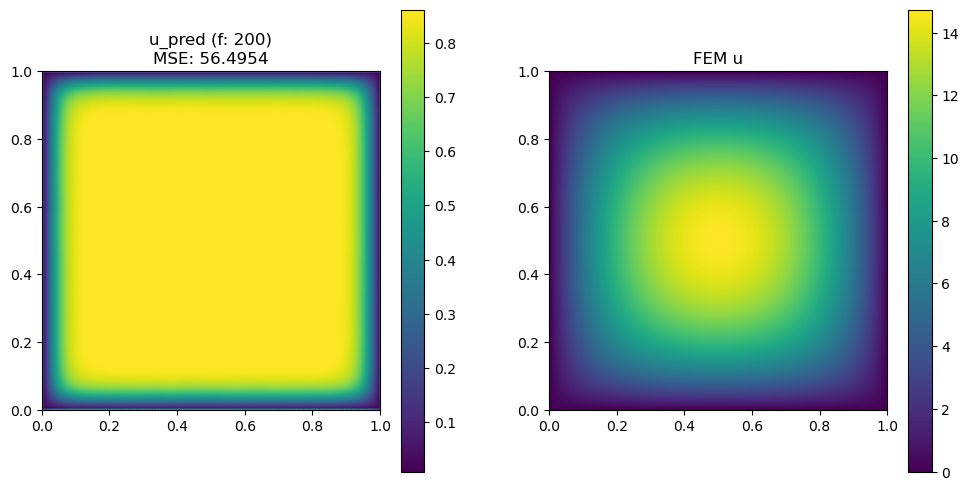

In [14]:
test_f_values = [-200, -20, 5, 20, 200]
c4n, n4e, n4db, ind4e = mesh_fem_2d_rec(a, b, a, b, M, M, k)
M_R, Srr_R, Sss_R, Dr_R, Ds_R = get_matrices_2d(k)

for test_f_value in test_f_values:
    new_f = np.full((256, 256), test_f_value)
    f_tensor = torch.tensor(new_f).unsqueeze(0).unsqueeze(0).float().to(device)

    with torch.no_grad():
        predicted_u, _ = model(f_tensor)

    predicted_u = predicted_u.squeeze().cpu().numpy()

    f = lambda x: np.full(x.shape[0], test_f_value)
    u_D = lambda x: x[:,0] * 0

    fem_u = fem_poisson_solver(c4n, n4e, n4db, ind4e, k, M_R, Srr_R, Sss_R, f, u_D)
    fem_u_reshaped = fem_u.reshape((256, 256))
    
    mse = np.mean((predicted_u - fem_u_reshaped) ** 2)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"u_pred (f: {test_f_value})\nMSE: {mse:.4f}")
    plt.imshow(predicted_u, cmap='viridis', extent=(0, 1, 0, 1))
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.title(f"FEM u")
    plt.imshow(fem_u_reshaped, cmap='viridis', extent=(0, 1, 0, 1))
    plt.colorbar()

    plt.show()

In [15]:
test_f_values = [-200, -20, 5, 20, 200]
c4n, n4e, n4db, ind4e = mesh_fem_2d_rec(a, b, a, b, M, M, k)
M_R, Srr_R, Sss_R, Dr_R, Ds_R = get_matrices_2d(k)

for test_f_value in test_f_values:
    new_f = np.full((256, 256), test_f_value)
    f_tensor = torch.tensor(new_f).unsqueeze(0).unsqueeze(0).float().to(device)

    with torch.no_grad():
        predicted_u, _ = model(f_tensor)

    predicted_u = predicted_u.squeeze().cpu().numpy()

    f = lambda x: np.full(x.shape[0], test_f_value)
    u_D = lambda x: x[:,0] * 0

    fem_u = fem_poisson_solver(c4n, n4e, n4db, ind4e, k, M_R, Srr_R, Sss_R, f, u_D)
    fem_u_reshaped = fem_u.reshape((256, 256))
    
    mse = np.mean((predicted_u - fem_u_reshaped) ** 2)
    print(f'Mean Squared Error: {mse}\n')
    print(f'Predicted u: \n{predicted_u}\n')
    print(f'FEM u: \n{fem_u_reshaped}\n')


Mean Squared Error: 79.40796790494167

Predicted u: 
[[0.5365803  0.25166088 0.15271458 ... 0.30631402 0.16397107 0.5544922 ]
 [0.1375891  0.0013835  0.00218094 ... 0.00180387 0.00103106 0.14495675]
 [0.12450898 0.002376   0.00425867 ... 0.00384021 0.00188489 0.20460814]
 ...
 [0.2795535  0.00222036 0.00454637 ... 0.00471429 0.00225449 0.12508288]
 [0.07276113 0.00114107 0.00243381 ... 0.00252398 0.00138319 0.17256612]
 [0.755971   0.06800485 0.21408607 ... 0.07290364 0.11689073 0.37403506]]

FEM u: 
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.0104596  -0.01917227 ... -0.01917227 -0.0104596
   0.        ]
 [ 0.         -0.01917227 -0.03610501 ... -0.03610501 -0.01917227
   0.        ]
 ...
 [ 0.         -0.01917227 -0.03610501 ... -0.03610501 -0.01917227
   0.        ]
 [ 0.         -0.0104596  -0.01917227 ... -0.01917227 -0.0104596
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]

Mean Squared Error: